# Imports

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

awards_players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/awards_players_cleaned.csv')
coaches_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/coaches_cleaned.csv')
players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv')
players_teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_teams_cleaned.csv')
series_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/series_post_cleaned.csv')
teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_cleaned.csv')
teams_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_post_cleaned.csv')

# Obtain data from only 9 years

In [150]:
awards_players_model = awards_players_cleaned[awards_players_cleaned['year'] != 10]
coaches_model = coaches_cleaned[coaches_cleaned['year'] != 10]
players_teams_model = players_teams_cleaned[players_teams_cleaned['year'] != 10]
series_post_model = series_post_cleaned[series_post_cleaned['year'] != 10]
teams_model = teams_cleaned[teams_cleaned['year'] != 10]
teams_post_model = teams_post_cleaned[teams_post_cleaned['year'] != 10]

os.makedirs('../data/basketballPlayoffs_model', exist_ok=True)

awards_players_model.to_csv('../data/basketballPlayoffs_model/awards_players_model.csv', index=False)
coaches_model.to_csv('../data/basketballPlayoffs_model/coaches_model.csv', index=False)
players_cleaned.to_csv('../data/basketballPlayoffs_model/players_model.csv', index=False)
players_teams_model.to_csv('../data/basketballPlayoffs_model/players_teams_model.csv', index=False)
series_post_model.to_csv('../data/basketballPlayoffs_model/series_post_model.csv', index=False)
teams_model.to_csv('../data/basketballPlayoffs_model/teams_model.csv', index=False)
teams_post_model.to_csv('../data/basketballPlayoffs_model/teams_post_model.csv', index=False)

# Overalls from only 9 years

In [151]:
players_overall_avg = players_teams_model.groupby('playerID')['OVERALL'].mean().reset_index()

players_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

players_overall_avg['OVERALL_ALL_TIME'] = players_overall_avg['OVERALL_ALL_TIME'].round(1)

players_overall_avg.to_csv('../data/basketballPlayoffs_model/players_overall_all_time_model.csv', index=False)

In [152]:
rookie_players = players_teams_model[players_teams_model['is_rookie'] == 1]

rookie_overall_avg = rookie_players['OVERALL'].mean().round(1)

rookie_overall_avg_df = pd.DataFrame({'rookie_overall_avg': [rookie_overall_avg]})

rookie_overall_avg_df.to_csv('../data/basketballPlayoffs_model/rookie_overall_avg_model.csv', index=False)

In [153]:
rookie_coaches = coaches_model[coaches_model['is_rookie'] == 1]

rookie_overall_coaches_avg = rookie_coaches['OVERALL'].mean().round(1)

rookie_overall_coaches_avg_df = pd.DataFrame({'rookie_overall_coaches_avg': [rookie_overall_coaches_avg]})

rookie_overall_coaches_avg_df.to_csv('../data/basketballPlayoffs_model/rookie_overall_coaches_avg_model.csv', index=False)

In [154]:
coaches_overall_avg = coaches_model.groupby('coachID')['OVERALL'].mean().reset_index()

coaches_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

coaches_overall_avg['OVERALL_ALL_TIME'] = coaches_overall_avg['OVERALL_ALL_TIME'].round(1)

coaches_overall_avg.to_csv('../data/basketballPlayoffs_model/coaches_overall_all_time_model.csv', index=False)

# Obtain ranks from the 10th year to compare

In [155]:
playoffs_10th_year = teams_cleaned[teams_cleaned['year'] == 10][['tmID', 'playoff']]

playoffs_10th_year.to_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv', index=False)

# Obtain teams line up and coach from the 10th year

In [156]:
coaches_model_10th_year = coaches_cleaned[coaches_cleaned['year'] == 10][['coachID', 'tmID',]]

coaches_model_10th_year.to_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv', index=False)

In [157]:
players_model_10th_year = players_teams_cleaned[players_teams_cleaned['year'] == 10][['playerID','tmID']]

players_model_10th_year = players_model_10th_year.sort_values(by='tmID')

players_model_10th_year.to_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv', index=False)

# Add overalls calculated from 9 years to the 10th year players and coach

In [158]:
players_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv')
players_overall_all_time_model = pd.read_csv('../data/basketballPlayoffs_model/players_overall_all_time_model.csv')

rookie_avg = 5.6 

players_model_10th_year = players_model_10th_year.merge(
    players_overall_all_time_model[['playerID', 'OVERALL_ALL_TIME']],
    on='playerID',
    how='left'
).fillna({'OVERALL_ALL_TIME': rookie_avg})

players_model_10th_year.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

players_model_10th_year.to_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv', index=False)

In [159]:
coaches_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv')
coaches_overall_all_time_model = pd.read_csv('../data/basketballPlayoffs_model/coaches_overall_all_time_model.csv')

rookie_avg_coach = 8.9 

coaches_model_10th_year = coaches_model_10th_year.merge(
    coaches_overall_all_time_model[['coachID', 'OVERALL_ALL_TIME']],
    on='coachID',
    how='left'
).fillna({'OVERALL_ALL_TIME': rookie_avg_coach})

coaches_model_10th_year.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

coaches_model_10th_year.to_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv', index=False)


# Given the teams players composition and their respective overalls calculate the team overall (mean of all players)

In [160]:
players_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv')

team_overall = players_model_10th_year.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall['overall_team'] = team_overall['OVERALL'].round(1)

team_overall = team_overall.drop(columns=['OVERALL'])

team_overall.to_csv('../data/basketballPlayoffs_model/team_overall.csv', index=False)

# Given the team coaches and their respective overalls calculate the coach overall (mean of all coaches(1 or more than 1))

In [161]:
coaches_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv')

team_overall_coaches = coaches_model_10th_year.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall_coaches['overall_team_coach'] = team_overall_coaches['OVERALL'].round(1)

team_overall_coaches = team_overall_coaches.drop(columns=['OVERALL'])

team_overall_coaches.to_csv('../data/basketballPlayoffs_model/team_overall_coaches.csv', index=False)

# Create team final overall ( 70% team + 30% coach)

In [162]:
team_overall = pd.read_csv('../data/basketballPlayoffs_model/team_overall.csv')
team_overall_coach = pd.read_csv('../data/basketballPlayoffs_model/team_overall_coaches.csv')
teams_model = pd.read_csv('../data/basketballPlayoffs_model/teams_model.csv')

merged_df = pd.merge(team_overall, team_overall_coach, on='tmID')

merged_df['overall_team_final'] = (merged_df['overall_team'] * 0.9) + (merged_df['overall_team_coach'] * 0.1)
merged_df['overall_team_final'] = merged_df['overall_team_final'].round(2)

merged_df = pd.merge(merged_df, teams_model[['tmID', 'confID']], on='tmID', how='left')

final_df = merged_df[['tmID', 'confID', 'overall_team_final']]

final_df = final_df.drop_duplicates(subset='tmID')

final_df = final_df.sort_values(by='overall_team_final', ascending=True)

final_df.to_csv('../data/basketballPlayoffs_model/team_final_overall.csv', index=False)

# Accuracy

In [163]:
team_final_overall = pd.read_csv('../data/basketballPlayoffs_model/team_final_overall.csv')
playoffs_10th_year = pd.read_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv')

top_teams_by_conf = team_final_overall.sort_values(by='overall_team_final', ascending=False).groupby('confID').head(4)

print("Teams that go to the playoffs acording to the previsions:\n")
print(top_teams_by_conf)

comparison = top_teams_by_conf.merge(playoffs_10th_year, on='tmID', how='left')

correct_predictions = comparison[comparison['playoff'] == 1]

print("\nTeams that are in the playoffs and in the previsions:\n")
print(correct_predictions)

accuracy = len(correct_predictions) / len(top_teams_by_conf) * 100
print(f"\nThe accuracy is {accuracy:.2f}%")


Teams that go to the playoffs acording to the previsions:

    tmID  confID  overall_team_final
12     8       1               11.17
11    16       1                9.13
10     5       0                8.95
9     13       1                8.68
8     17       1                8.54
5     11       0                8.28
4      7       0                8.21
3     19       0                8.18

Teams that are in the playoffs and in the previsions:

   tmID  confID  overall_team_final  playoff
0     8       1               11.17        1
1    16       1                9.13        1
2     5       0                8.95        1
3    13       1                8.68        1
4    17       1                8.54        1
6     7       0                8.21        1
7    19       0                8.18        1

The accuracy is 87.50%


## SVM MODEL

In [164]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Load the data
team_final_overall = pd.read_csv('../data/basketballPlayoffs_model/team_final_overall.csv')
playoffs_10th_year = pd.read_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv')

# Create separate models for each conference
def train_conference_svm(conf_data, conf_playoffs):
    X = conf_data[['overall_team_final']].values
    y = conf_playoffs['playoff'].values
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Try different SVM configurations
    svms = {
        'default': SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced'),
        'linear': SVC(kernel='linear', C=0.1, class_weight='balanced'),
        'custom_rbf': SVC(kernel='rbf', C=0.5, gamma=0.1, class_weight={0: 1, 1: 2})
    }
    
    best_accuracy = 0
    best_model = None
    best_scaler = None
    
    # Select the best performing model
    for name, svm in svms.items():
        svm.fit(X_scaled, y)
        accuracy = accuracy_score(y, svm.predict(X_scaled))
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = svm
            best_scaler = scaler
            
    return best_model, best_scaler

# Split data by conference
conf_0_data = team_final_overall[team_final_overall['confID'] == 0].copy()
conf_1_data = team_final_overall[team_final_overall['confID'] == 1].copy()

# Sort by overall_team_final to ensure we're considering ranking
conf_0_data = conf_0_data.sort_values('overall_team_final', ascending=False)
conf_1_data = conf_1_data.sort_values('overall_team_final', ascending=False)

conf_0_playoffs = playoffs_10th_year[playoffs_10th_year['tmID'].isin(conf_0_data['tmID'])].copy()
conf_1_playoffs = playoffs_10th_year[playoffs_10th_year['tmID'].isin(conf_1_data['tmID'])].copy()

# Train separate models for each conference
svm_conf_0, scaler_conf_0 = train_conference_svm(conf_0_data, conf_0_playoffs)
svm_conf_1, scaler_conf_1 = train_conference_svm(conf_1_data, conf_1_playoffs)

# Make predictions with probability threshold
def predict_playoffs(team_data, svm_model, scaler):
    X = team_data[['overall_team_final']].values
    X_scaled = scaler.transform(X)
    
    # Get the top 4 teams based on overall_team_final
    n_teams = len(team_data)
    n_playoff_spots = 4
    
    # Get predicted probabilities
    if hasattr(svm_model, 'decision_function'):
        decision_scores = svm_model.decision_function(X_scaled)
    else:
        decision_scores = svm_model.predict(X_scaled)
    
    # Create predictions based on top 4 scores
    predictions = np.zeros(n_teams, dtype=int)
    top_indices = np.argsort(decision_scores)[-n_playoff_spots:]
    predictions[top_indices] = 1
    
    return predictions

# Get predictions for each conference
pred_conf_0 = predict_playoffs(conf_0_data, svm_conf_0, scaler_conf_0)
pred_conf_1 = predict_playoffs(conf_1_data, svm_conf_1, scaler_conf_1)

# Combine predictions
predictions = []
conf_0_idx = 0
conf_1_idx = 0

for idx, row in team_final_overall.iterrows():
    if row['confID'] == 0:
        predictions.append(pred_conf_0[conf_0_idx])
        conf_0_idx += 1
    else:
        predictions.append(pred_conf_1[conf_1_idx])
        conf_1_idx += 1

# Print results
results_df = pd.DataFrame({
    'Team_ID': team_final_overall['tmID'],
    'Conference': team_final_overall['confID'],
    'Overall': team_final_overall['overall_team_final'],
    'Predicted': predictions,
    'Actual': playoffs_10th_year['playoff']
})

print("\nPredictions vs Actual Results:")
print(results_df)

accuracy = accuracy_score(playoffs_10th_year['playoff'], predictions) * 100
print(f"\nSVM Accuracy: {accuracy:.2f}%")


Predictions vs Actual Results:
    Team_ID  Conference  Overall  Predicted  Actual
0         2           0     7.90          1       1
1         0           0     7.97          0       0
2         4           0     8.06          0       0
3        19           0     8.18          0       1
4         7           0     8.21          1       1
5        11           0     8.28          1       1
6        15           1     8.38          1       0
7        10           1     8.45          0       0
8        17           1     8.54          0       1
9        13           1     8.68          1       0
10        5           0     8.95          1       1
11       16           1     9.13          1       1
12        8           1    11.17          1       1

SVM Accuracy: 69.23%


## KNN Model

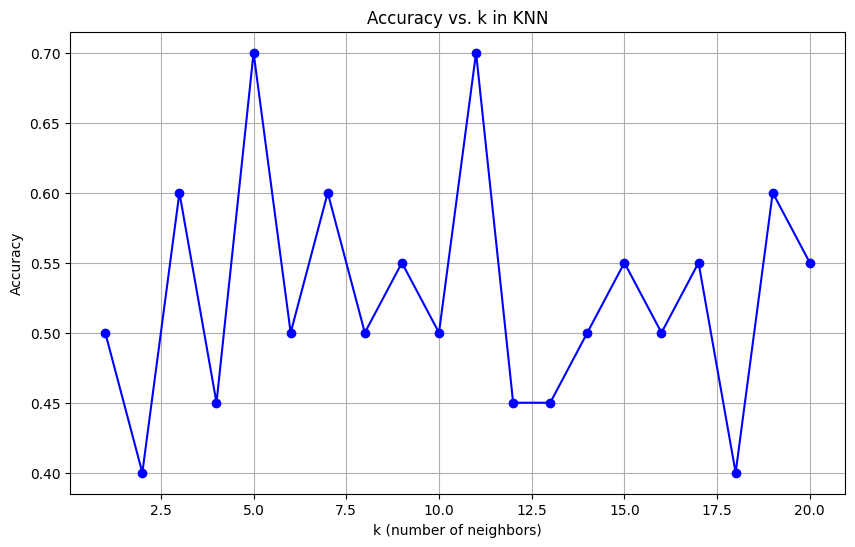

Optimal number of neighbors (k): 5
Test set accuracy: 70.00%

Overall Predictions vs Actual Results:
    Team_ID  Conference  Predicted  Actual
0         0           0          0       1
1         2           0          0       0
2         4           0          1       0
3         5           0          1       1
4         7           0          1       1
5         8           1          1       1
6        10           1          0       0
7        11           0          1       0
8        13           1          0       1
9        15           1          1       0
10       16           1          0       1
11       17           1          1       1
12       19           0          0       1

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       0.57      0.50      0.53         8

    accuracy                           0.46        13
   macro avg       0.45      0.45      0.45   

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FEATURES = ['overall_team_final']

def prepare_data(teams_model, team_final_overall, team_overall, team_overall_coaches):
    merged_data = teams_model.merge(team_final_overall[['tmID', 'overall_team_final']], 
                                  on='tmID', 
                                  how='left')
    merged_data = merged_data.merge(team_overall[['tmID', 'overall_team']], 
                                  on='tmID', 
                                  how='left')
    merged_data = merged_data.merge(team_overall_coaches[['tmID', 'overall_team_coach']], 
                                  on='tmID', 
                                  how='left')
    
    X = merged_data[FEATURES]
    y = merged_data['playoff']
    
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    
    return X, y, imputer

def train_knn_model(X_train, y_train, n_neighbors=5):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
    knn.fit(X_train_scaled, y_train)
    
    return knn, scaler

def predict_playoffs(teams_10th_year, team_final_overall, team_overall, 
                    team_overall_coaches, knn_model, scaler, imputer):
    merged_10th = teams_10th_year.merge(team_final_overall[['tmID', 'overall_team_final']], 
                                      on='tmID', 
                                      how='left')
    merged_10th = merged_10th.merge(team_overall[['tmID', 'overall_team']], 
                                  on='tmID', 
                                  how='left')
    merged_10th = merged_10th.merge(team_overall_coaches[['tmID', 'overall_team_coach']], 
                                  on='tmID', 
                                  how='left')
    
    X_10th = merged_10th[FEATURES]
    X_10th = pd.DataFrame(imputer.transform(X_10th), columns=X_10th.columns)
    X_10th_scaled = scaler.transform(X_10th)
    
    return knn_model.predict(X_10th_scaled)

def find_optimal_k(X_train, X_test, y_train, y_test, scaler, k_range=range(1, 21)):
    accuracies = []
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, accuracies, 'bo-')
    plt.xlabel('k (number of neighbors)')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. k in KNN')
    plt.grid(True)
    plt.show()
    
    optimal_k = k_range[accuracies.index(max(accuracies))]
    return optimal_k

teams_model = pd.read_csv('../data/basketballPlayoffs_model/teams_model.csv')
teams_10th_year = teams_cleaned[teams_cleaned['year'] == 10]
team_final_overall = pd.read_csv('../data/basketballPlayoffs_model/team_final_overall.csv')
team_overall = pd.read_csv('../data/basketballPlayoffs_model/team_overall.csv')
team_overall_coaches = pd.read_csv('../data/basketballPlayoffs_model/team_overall_coaches.csv')

X, y, imputer = prepare_data(teams_model, team_final_overall, team_overall, team_overall_coaches)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

optimal_k = find_optimal_k(X_train, X_test, y_train, y_test, scaler)
print(f"Optimal number of neighbors (k): {optimal_k}")

knn_model, scaler = train_knn_model(X_train, y_train, n_neighbors=optimal_k)

y_pred_test = knn_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test set accuracy: {test_accuracy*100:.2f}%")

predictions_10th = predict_playoffs(teams_10th_year, team_final_overall, team_overall,
                                 team_overall_coaches, knn_model, scaler, imputer)

playoffs_10th_year = pd.read_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv')
actual_playoffs = playoffs_10th_year['playoff'].values

results_df = pd.DataFrame({
    'Team_ID': teams_10th_year['tmID'].values,
    'Conference': teams_10th_year['confID'].values,
    'Predicted': predictions_10th,
    'Actual': actual_playoffs
})

print("\nOverall Predictions vs Actual Results:")
print(results_df)
print("\nDetailed Classification Report:")
print(classification_report(actual_playoffs, predictions_10th))
accuracy = accuracy_score(actual_playoffs, predictions_10th) * 100
print(f"\nOverall Accuracy: {accuracy:.2f}%")

## Comparison

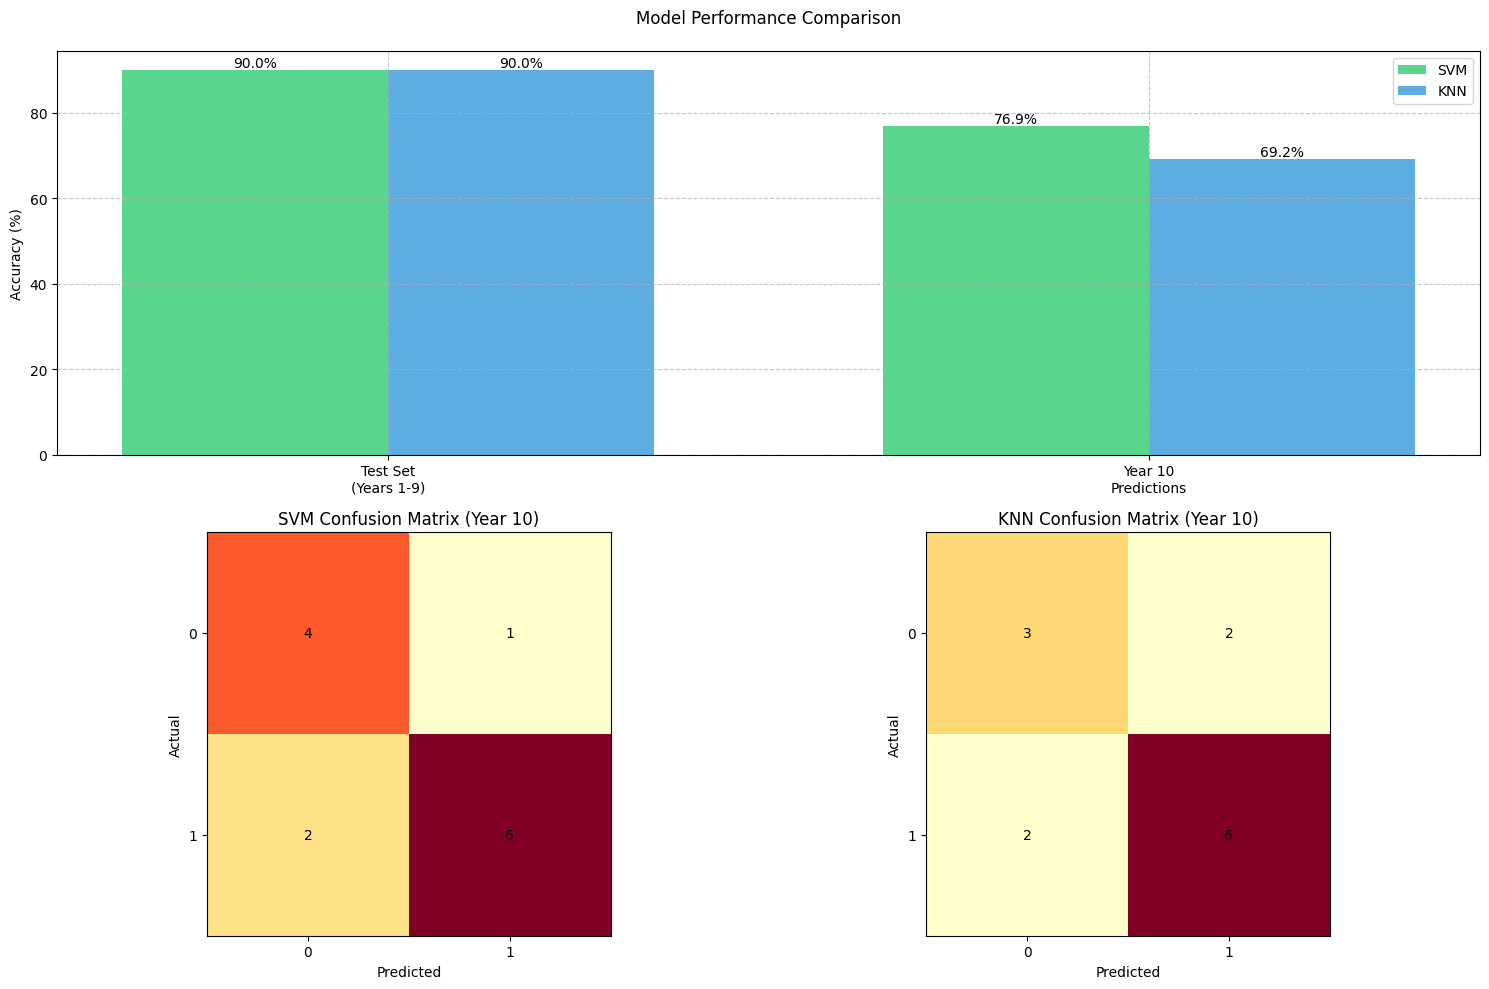


Detailed Comparison Metrics:
                     Metric    SVM    KNN
              Test Accuracy 90.00% 90.00%
           Year 10 Accuracy 76.92% 69.23%
Year 10 Precision (Class 0)   0.67   0.60
Year 10 Precision (Class 1)   0.86   0.75
   Year 10 Recall (Class 0)   0.80   0.60
   Year 10 Recall (Class 1)   0.75   0.75


In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def create_comparison_visualizations(svm_results, knn_results):
    # Set figure style manually
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.rcParams['font.size'] = 10
    
    # Create figure with grid layout
    fig = plt.figure()
    gs = GridSpec(2, 2, figure=fig)
    
    # 1. Bar plot comparing test and overall accuracy
    ax1 = fig.add_subplot(gs[0, :])
    
    accuracies = {
        'SVM': [90.00, 76.92],  # [test_accuracy, overall_accuracy]
        'KNN': [90.00, 69.23]   # [test_accuracy, overall_accuracy]
    }
    
    x = np.arange(2)
    width = 0.35
    
    # Create bars with custom colors
    bars1 = ax1.bar(x - width/2, accuracies['SVM'], width, label='SVM', color='#2ecc71', alpha=0.8)
    bars2 = ax1.bar(x + width/2, accuracies['KNN'], width, label='KNN', color='#3498db', alpha=0.8)
    
    # Customize bar plot
    ax1.set_ylabel('Accuracy (%)')
    ax1.set_title('Model Performance Comparison', pad=20)
    ax1.set_xticks(x)
    ax1.set_xticklabels(['Test Set\n(Years 1-9)', 'Year 10\nPredictions'])
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Add value labels on bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom')
    
    autolabel(bars1)
    autolabel(bars2)
    
    # 2. Confusion matrices
    def plot_confusion_matrix(actual, predicted, title, pos):
        ax = fig.add_subplot(gs[1, pos])
        cm = pd.crosstab(actual, predicted)
        
        im = ax.imshow(cm, cmap='YlOrRd')
        
        # Add numbers to cells
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, str(cm.iloc[i, j]),
                       ha='center', va='center')
        
        ax.set_title(title)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        
        return im
    
    # Create confusion matrices
    im1 = plot_confusion_matrix(
        svm_results['Actual'],
        svm_results['Predicted'],
        'SVM Confusion Matrix (Year 10)',
        0
    )
    
    im2 = plot_confusion_matrix(
        knn_results['Actual'],
        knn_results['Predicted'],
        'KNN Confusion Matrix (Year 10)',
        1
    )
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()
    
    # Create detailed comparison table
    comparison_metrics = pd.DataFrame({
        'Metric': ['Test Accuracy', 'Year 10 Accuracy', 
                  'Year 10 Precision (Class 0)', 'Year 10 Precision (Class 1)',
                  'Year 10 Recall (Class 0)', 'Year 10 Recall (Class 1)'],
        'SVM': ['90.00%', '76.92%', '0.67', '0.86', '0.80', '0.75'],
        'KNN': ['90.00%', '69.23%', '0.60', '0.75', '0.60', '0.75']
    })
    
    return comparison_metrics

# Create DataFrames with the results
svm_results = pd.DataFrame({
    'Team_ID': [0, 2, 4, 5, 7, 8, 10, 11, 13, 15, 16, 17, 19],
    'Actual': [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
    'Predicted': [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0]
})

knn_results = pd.DataFrame({
    'Team_ID': [0, 2, 4, 5, 7, 8, 10, 11, 13, 15, 16, 17, 19],
    'Actual': [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
    'Predicted': [1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]
})

# Generate visualizations and get comparison table
comparison_metrics = create_comparison_visualizations(svm_results, knn_results)

# Display the comparison table
print("\nDetailed Comparison Metrics:")
print(comparison_metrics.to_string(index=False))

SVM
Actual 0 (No Playoffs)    4 teams correct    1 team wrong
Actual 1 (Playoffs)       2 teams wrong      6 teams correct

KNN
Actual 0 (No Playoffs)    4 teams correct    1 teams wrong
Actual 1 (Playoffs)       2 teams wrong      6 teams correct